In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [7]:
df.columns = ['Signal', 'Density']
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [6]:
df.describe()

,Rebound Signal Strength nHz,Rock Density kg/m3
count,300.000000,300.000000
mean,49.725766,2.225063
std,28.341792,0.314512
min,0.700227,1.500000
25%,25.685798,1.987830
50%,50.602886,2.268597
75%,74.854294,2.476944
max,98.831658,2.750000


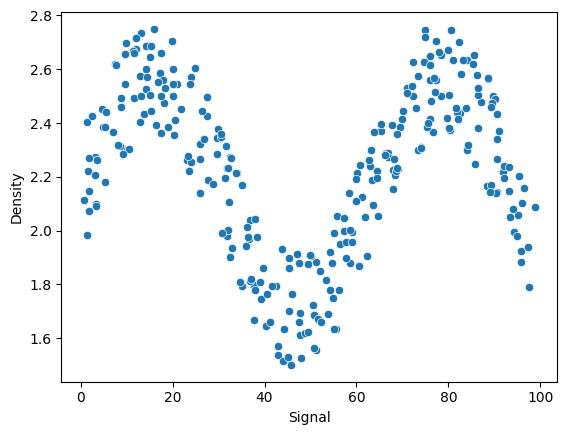

In [9]:
sns.scatterplot(data=df, x='Signal', y='Density');

In [46]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

X

array([[72.94512436],
       [14.2298772 ],
       [36.59733361],
       [ 9.57889939],
       [21.76589708],
       [89.64797256],
       [69.49273293],
       [20.15052036],
       [82.25633703],
       [64.42480217],
       [38.42706534],
       [ 9.89157994],
       [31.7410984 ],
       [90.4960676 ],
       [13.19342555],
       [ 9.55665673],
       [26.00550577],
       [24.81782725],
       [40.29631043],
       [29.60926638],
       [76.57740035],
       [82.61598742],
       [ 1.66229161],
       [17.32519267],
       [35.05157441],
       [63.47748521],
       [13.68823691],
       [17.49779896],
       [ 1.86382485],
       [17.96684624],
       [23.9388581 ],
       [66.36433682],
       [34.02717884],
       [76.03302052],
       [82.66759709],
       [66.78076834],
       [47.4528517 ],
       [74.02752794],
       [86.20473574],
       [72.24767039],
       [80.33899095],
       [36.86719496],
       [31.92883259],
       [85.68535822],
       [78.45459768],
       [19

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

lr_model = LinearRegression()
lr_model.fit(X, y)

y_pred = lr_model.predict(X_test)

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

RMSE: 0.25276190985623403
MAE: 0.207663542763215


In [18]:
y_pred

array([2.24013451, 2.21297994, 2.23117013, 2.23311781, 2.22502394,
       2.20880678, 2.22064286, 2.24130397, 2.23261445, 2.24004779,
       2.22237133, 2.20941003, 2.21879619, 2.22162679, 2.21410265,
       2.23601833, 2.23455748, 2.23867849, 2.23189405, 2.23156609,
       2.24071966, 2.22942943, 2.23509539, 2.23870346, 2.22050112,
       2.21860451, 2.22250048, 2.22417572, 2.21121829, 2.21339464])

In [20]:
signal_range = np.arange(0,100)
signal_pred = lr_model.predict(signal_range.reshape(-1,1))


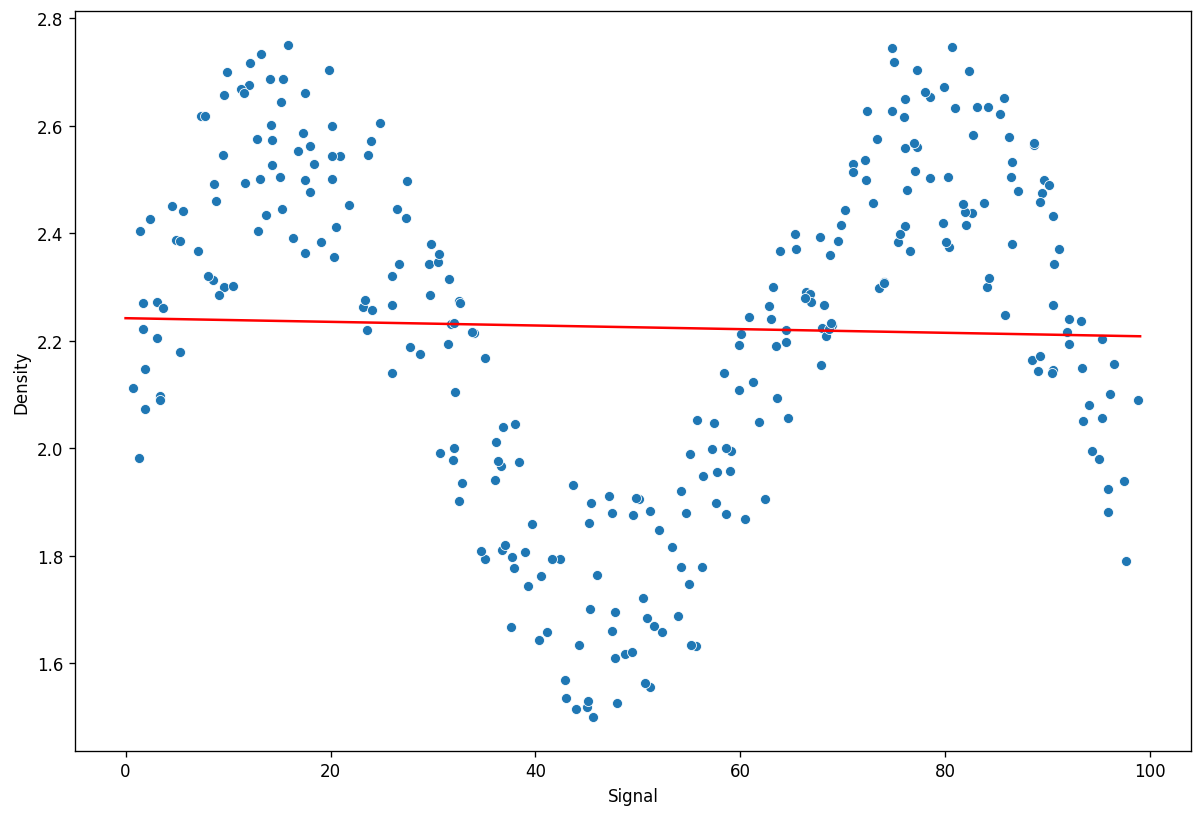

In [26]:
plt.figure(figsize=(12,8), dpi=120)
sns.scatterplot(data=df, x='Signal', y='Density')

plt.plot(signal_range, signal_pred, c='red');

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def run_model(model, X_train, y_train, X_test, y_test):
    # обучение модели
    model.fit(X_train, y_train)
    
    # метрики
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}\n')
    
    # Построить график с результатами.
    signal_range = np.arange(0,100)
    signal_pred = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8), dpi=120)
    sns.scatterplot(data=df, x='Signal', y='Density')
    plt.plot(signal_range, signal_pred, c='red');

RMSE: 0.2570051996584629
MAE: 0.21119897331863297


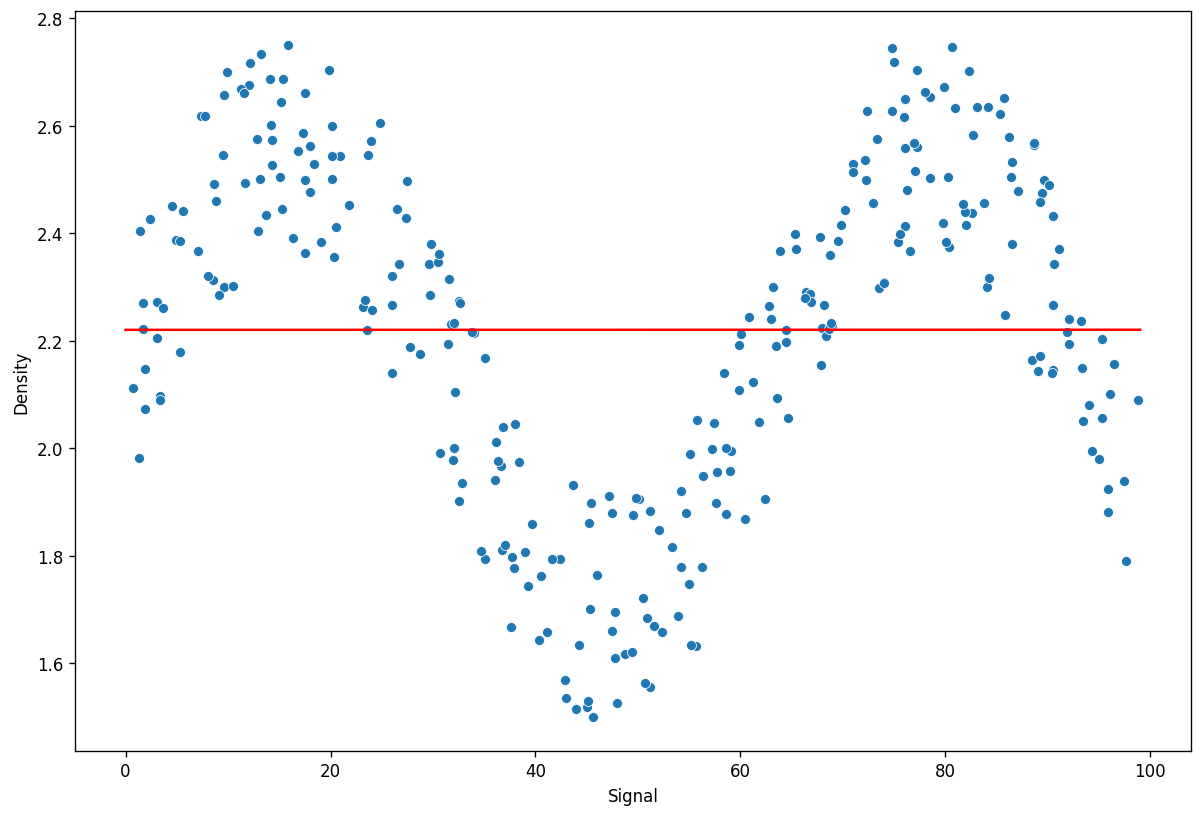

In [28]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

RMSE: 0.28173095637256484
MAE: 0.22903105443511465


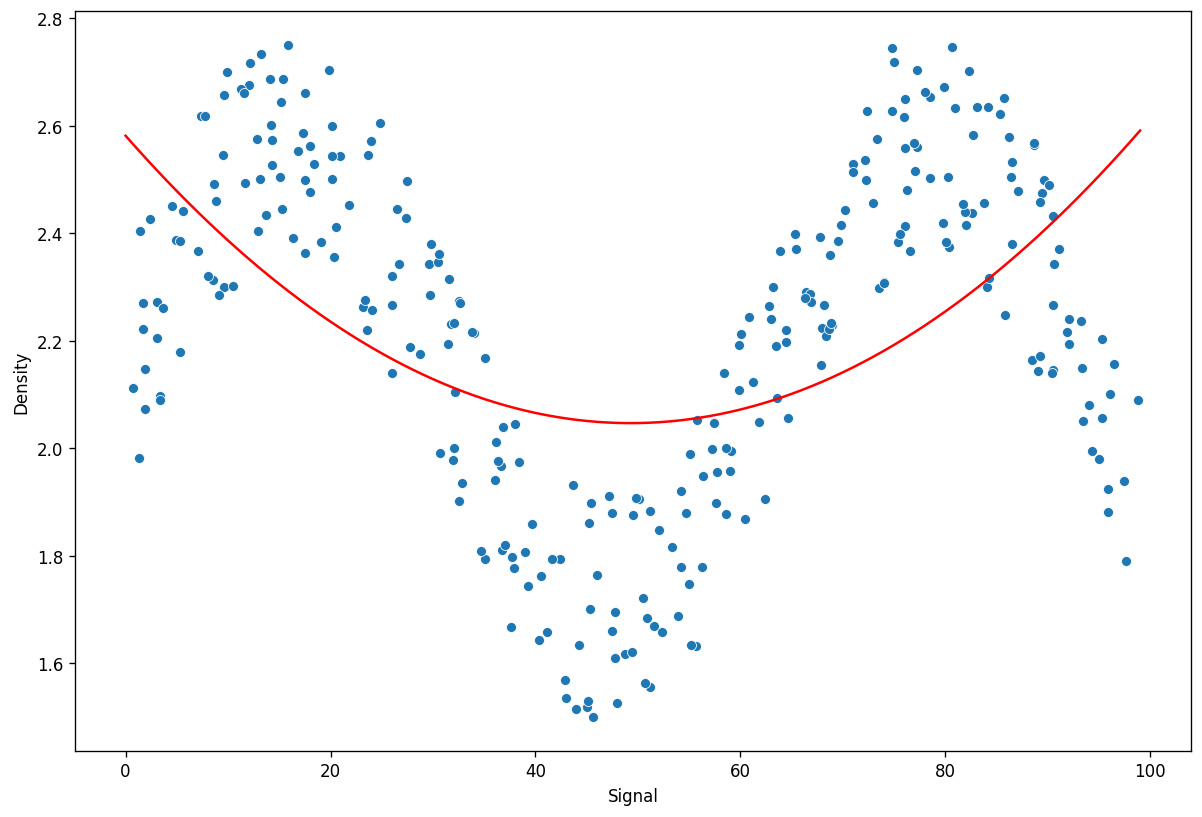

In [54]:
# Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

RMSE: 0.13807440063574766
MAE: 0.1196912262886379


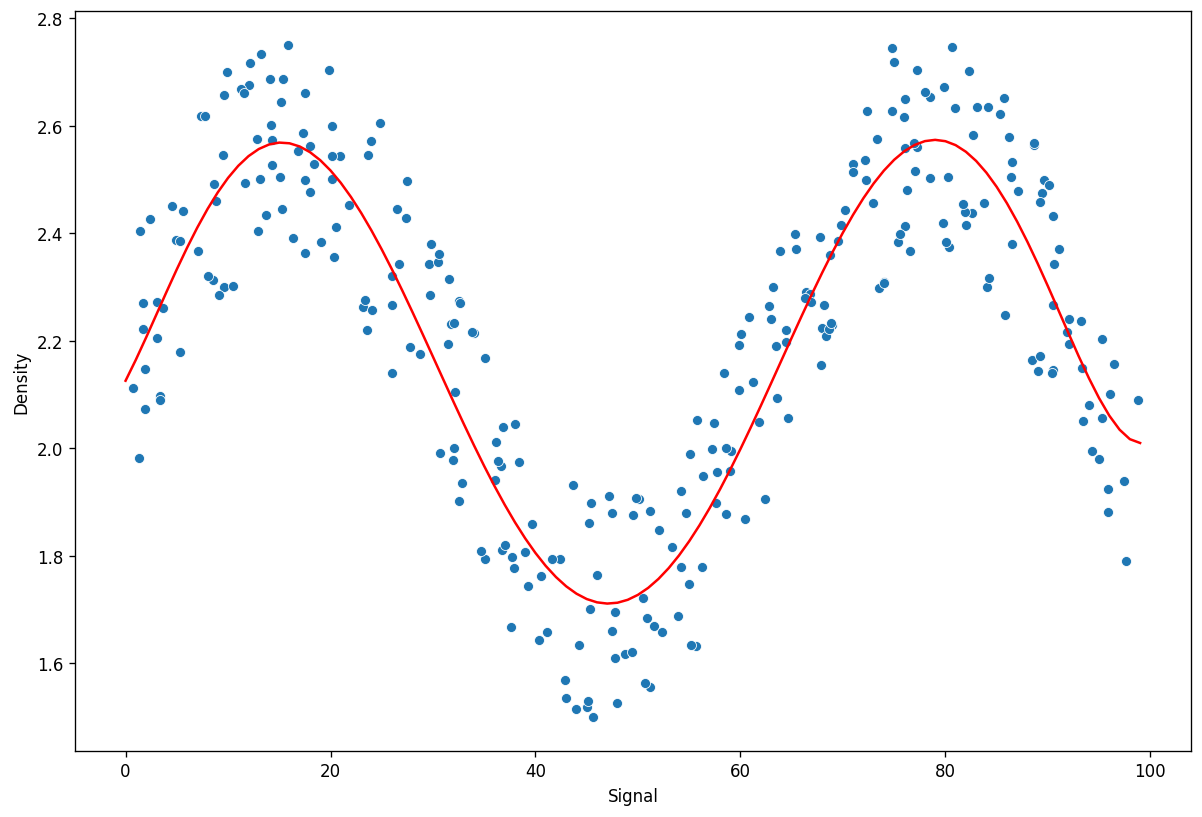

In [49]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

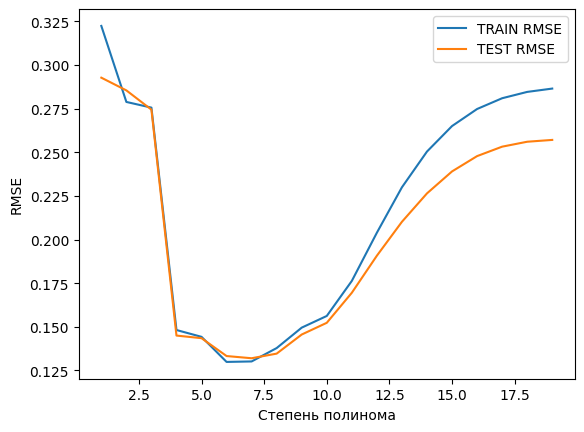

In [53]:
def poly_comparison(X, y):
    train_rmse_error = [] # ошибки разных моделей. 
    test_rmse_error = []

    for d in range(1,20):
        poly_converter = PolynomialFeatures(degree=d, include_bias=False)
        poly_features = poly_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))
        
        train_rmse_error.append(rmse_train)
        test_rmse_error.append(rmse_test)
        

    plt.figure()
    plt.plot(range(1,20), train_rmse_error, label='TRAIN RMSE')
    plt.plot(range(1,20), test_rmse_error, label='TEST RMSE')
    plt.xlabel('Степень полинома')
    plt.ylabel('RMSE')
    plt.legend();
    

poly_comparison(X, y)

---
### KNN for regression.

RMSE: 0.15954234753677107
MAE: 0.13363165935705315



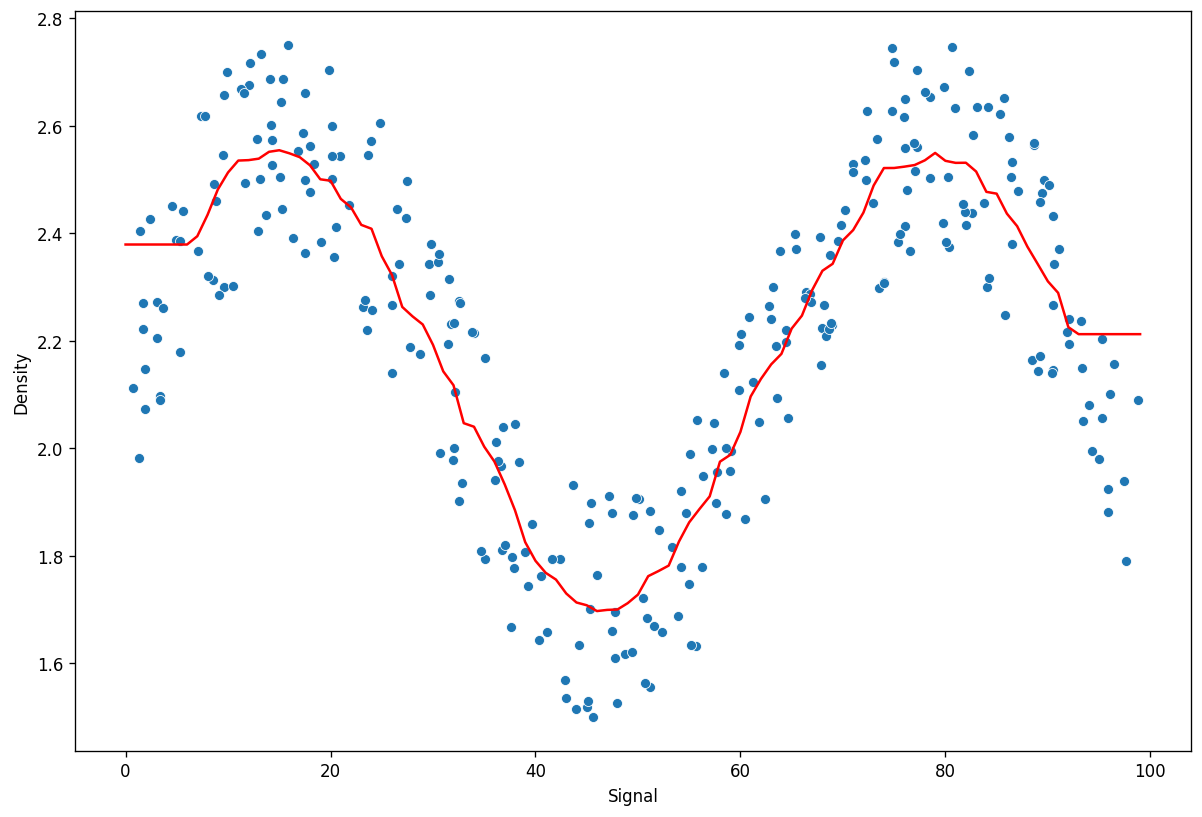

In [58]:
from sklearn.neighbors import KNeighborsRegressor

k_values = [30]

for d in k_values:
    
    model = KNeighborsRegressor(n_neighbors=d)
    run_model(model, X_train, y_train, X_test, y_test)

---
### Decision Tree Regressor.

RMSE: 0.15234870286353372
MAE: 0.11877297474442386



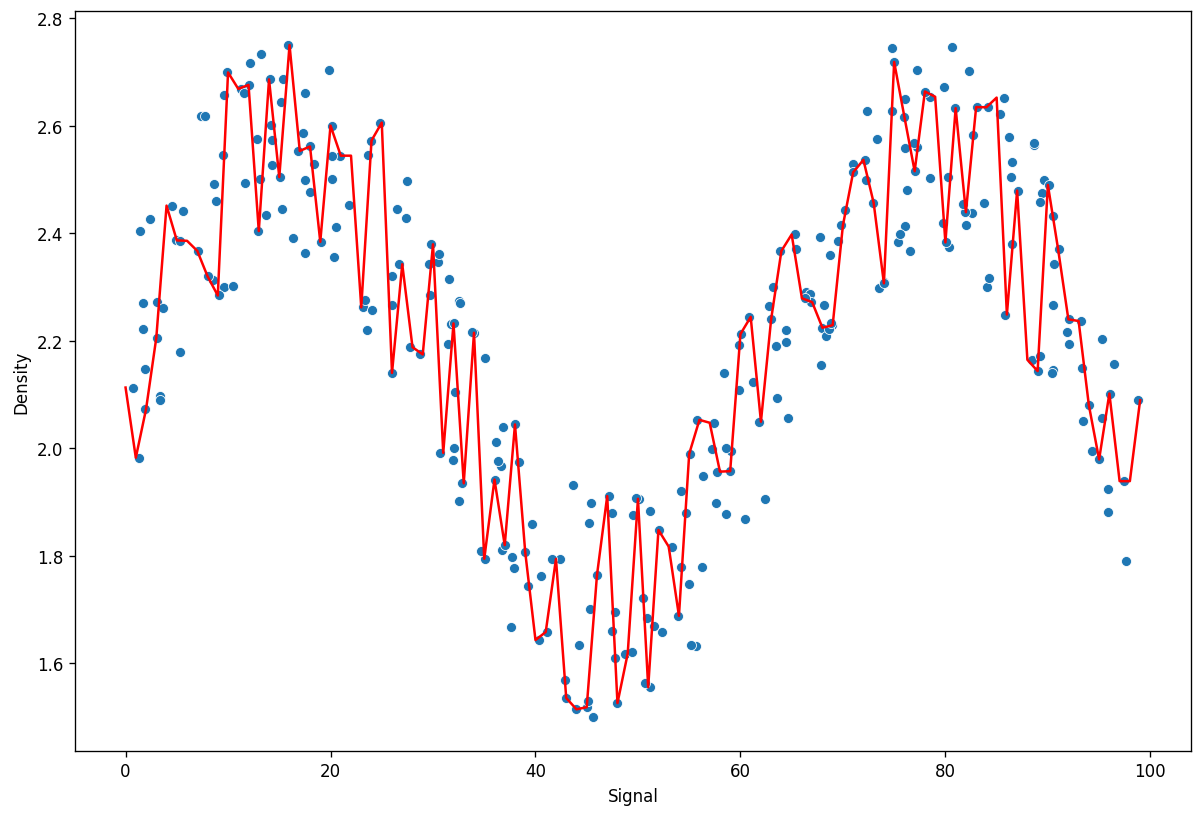

In [59]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

run_model(model, X_train, y_train, X_test, y_test)

---
### Support Vector Machine (SVM).

RMSE: 0.1263507854819897
MAE: 0.10839555187432501



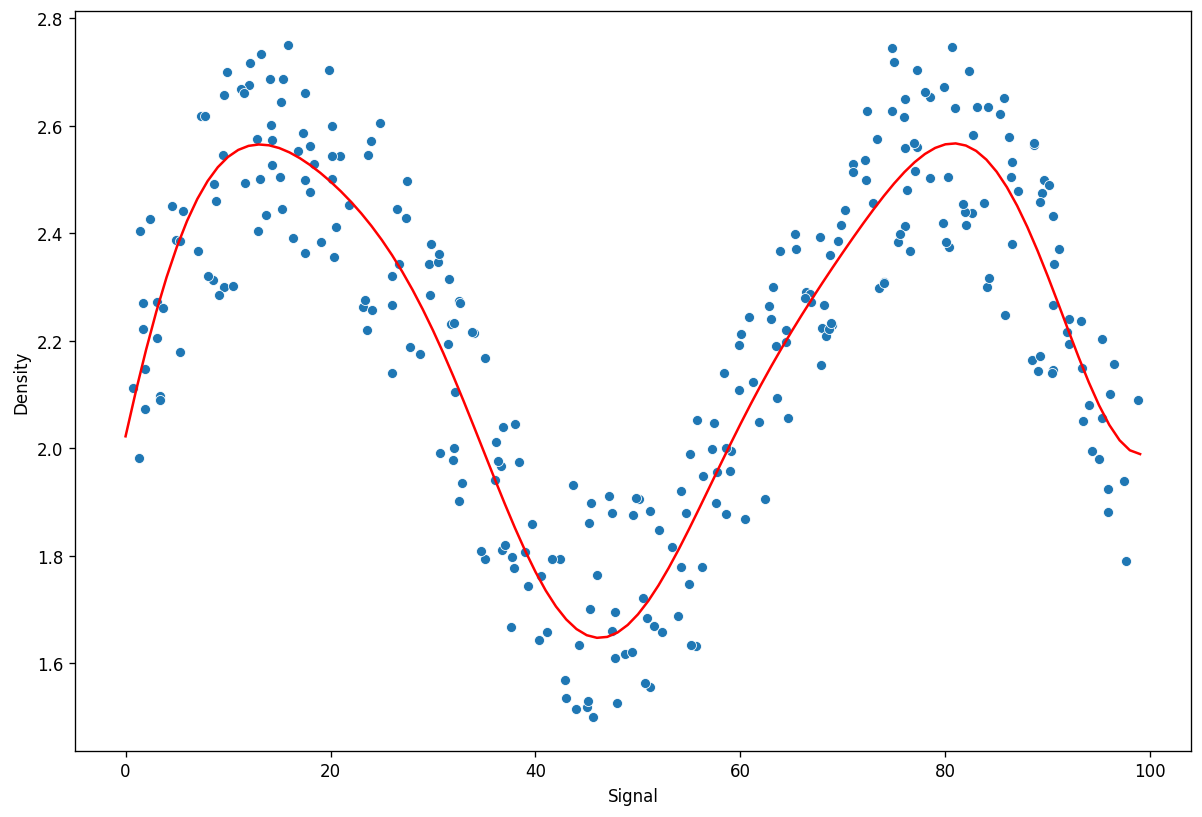

In [60]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

model = SVR()

param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
              'gamma': ['auto', 'scale']}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

run_model(grid, X_train, y_train, X_test, y_test)

---
### Random Forest.

RMSE: 0.1441477028030875
MAE: 0.11990754162390187



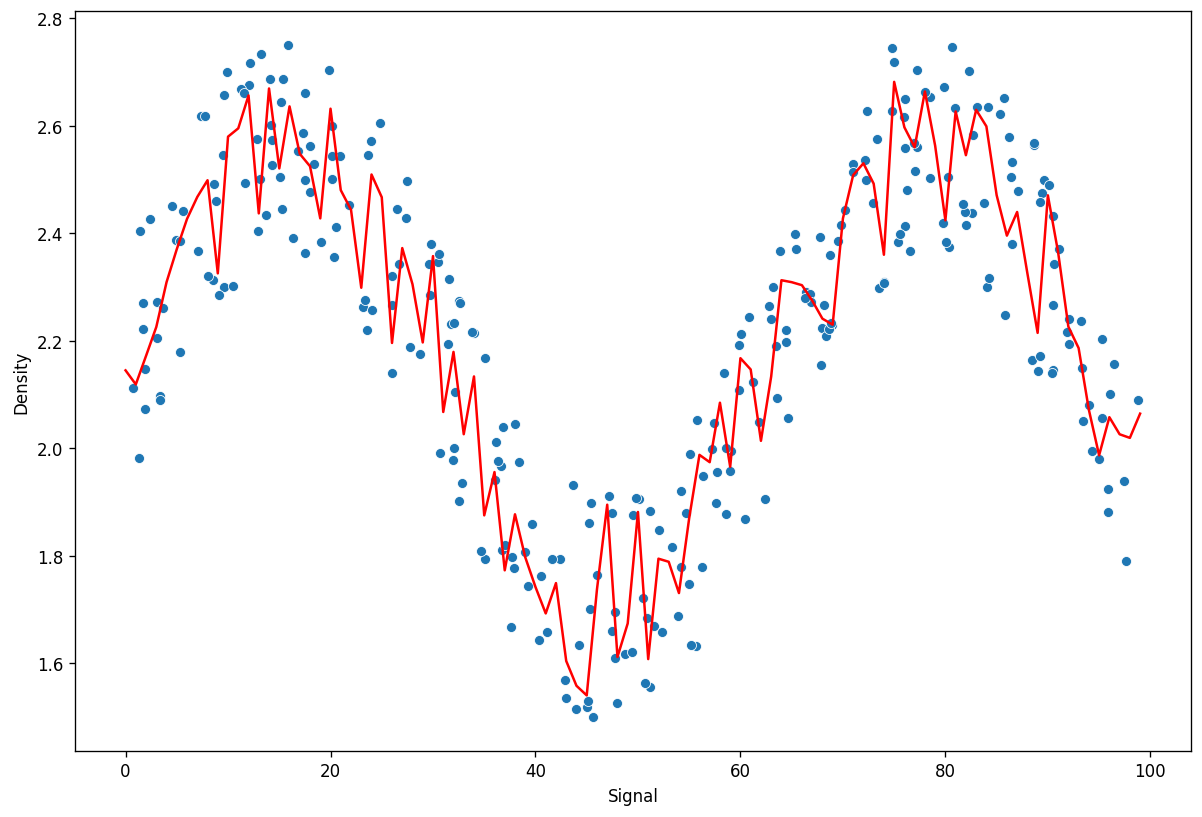

In [62]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)

run_model(model, X_train, y_train, X_test, y_test)

---
### Boosted trees.

RMSE: 0.13294148649584664
MAE: 0.11318284854800688



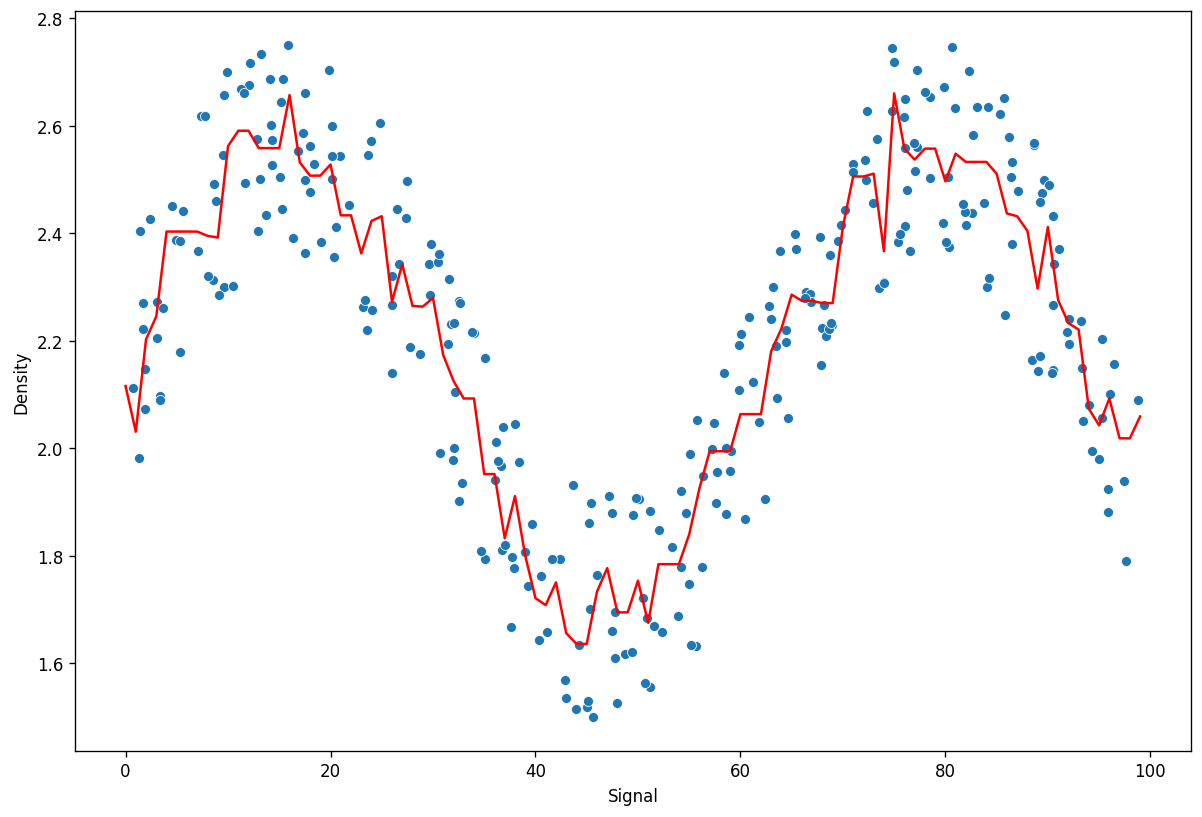

In [63]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

model = GradientBoostingRegressor()

run_model(model, X_train, y_train, X_test, y_test)

RMSE: 0.1398742405649109
MAE: 0.11825429850102334



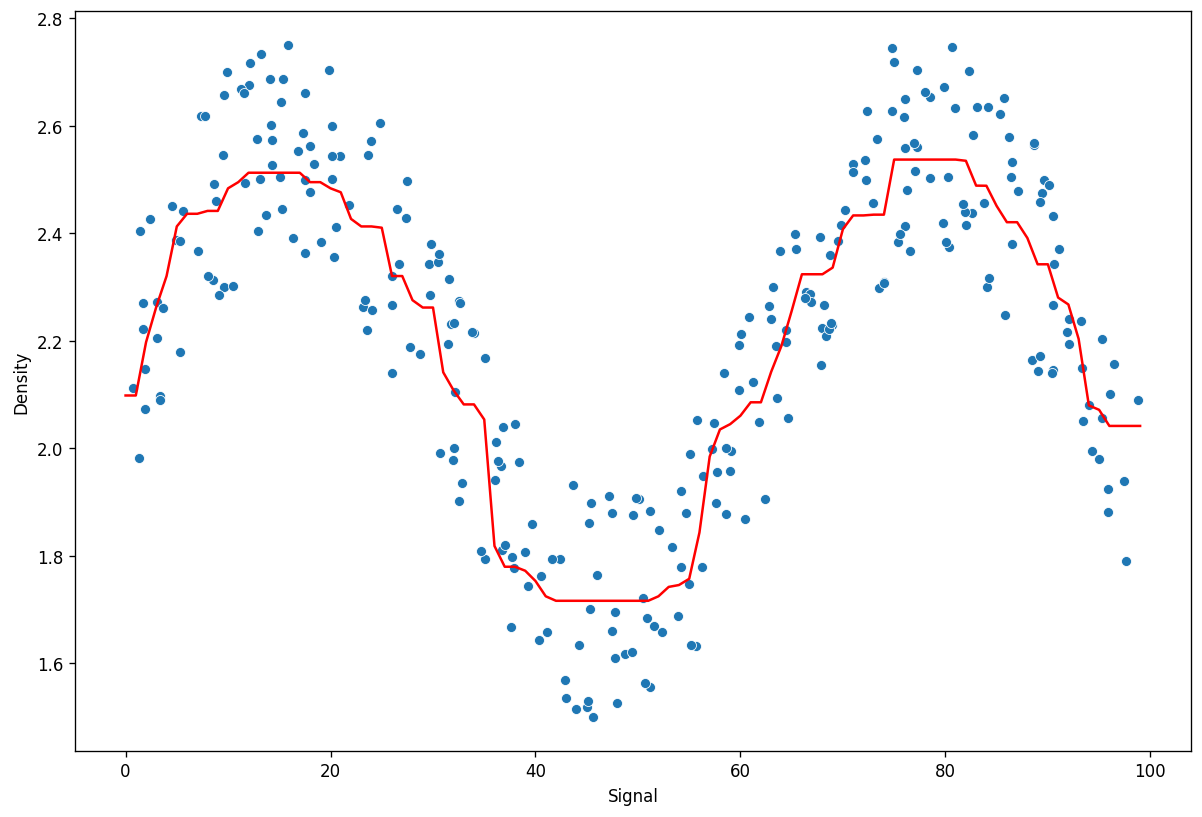

In [64]:
model = AdaBoostRegressor()

run_model(model, X_train, y_train, X_test, y_test)